In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load dataset
df = pd.read_csv('online_advertising_performance_data.csv')  # Replace with actual file path


In [3]:

# Display basic information and first few rows
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(5), int64(4

In [4]:
df.head(10)

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,NaN,NaN
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,NaN,NaN
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,NaN,NaN
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,NaN,NaN
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,NaN,NaN
5,April,1,camp 1,Low,160 x 600,ghi,16,0.0249,0,0.0000,0,0.0000,NaN,NaN
6,April,1,camp 1,Low,160 x 600,mno,2234,0.4044,10,1.8347,3,101.7494,NaN,NaN
7,April,1,camp 1,Medium,160 x 600,def,2963,1.8899,4,0.7338,4,100.5044,NaN,NaN
8,April,1,camp 1,Medium,160 x 600,ghi,580,0.9917,9,1.6512,0,0.0000,NaN,NaN
9,April,1,camp 1,Medium,160 x 600,mno,20152,11.1678,185,33.9397,13,653.1896,NaN,NaN


In [5]:
df.drop(columns=['Unnamed: 12','Unnamed: 13'],inplace=True)

In [6]:
df.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000


In [7]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['month', 'campaign_number', 'user_engagement', 'banner', 'placement'], dtype='object')

Index(['month', 'day', 'campaign_number', 'user_engagement', 'banner',
       'placement', 'displays', 'cost', 'clicks', 'revenue',
       'post_click_conversions', 'post_click_sales_amount'],
      dtype='object')


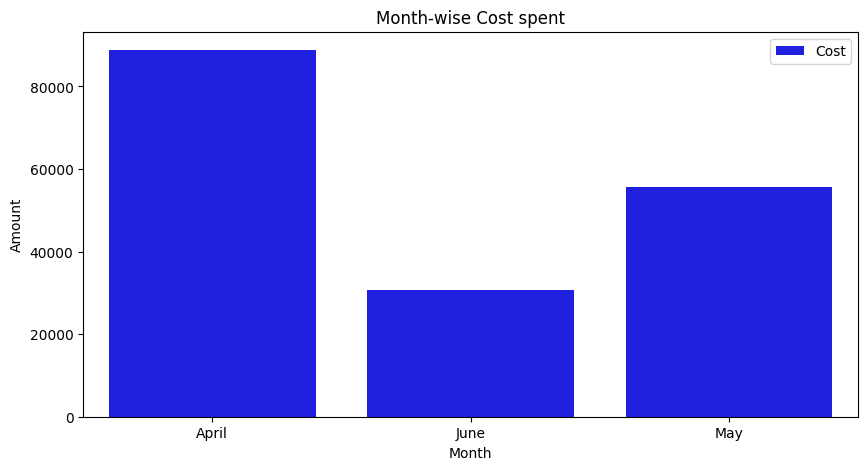

In [8]:
#Exploratory data analysis
print(df.columns)

df_monthly = df.groupby('month')[['cost', 'revenue']].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='month', y='cost', data=df_monthly, color='blue', label='Cost')
plt.title('Month-wise Cost spent')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.show()


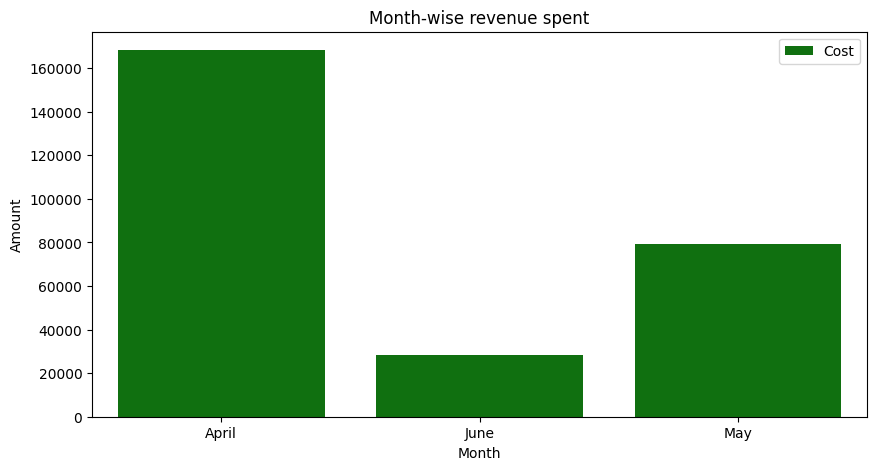

In [9]:
df_monthly = df.groupby('month')[['cost', 'revenue']].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='month', y='revenue', data=df_monthly, color='green', label='Cost')
plt.title('Month-wise revenue spent')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.show()

In [10]:
#Conclusion 1 # Overall every month the revenue generated is more than the cost spent on advertising

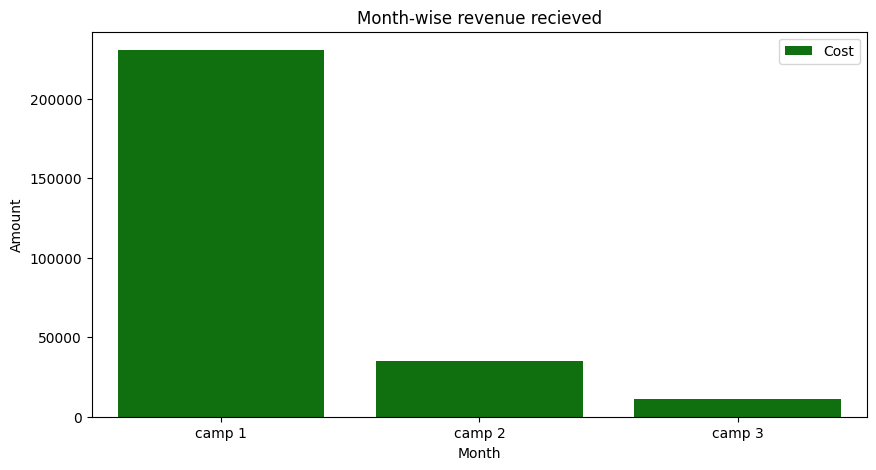

In [11]:
df_campaign = df.groupby('campaign_number')[['revenue']].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='campaign_number', y='revenue', data=df_campaign, color='green', label='Cost')
plt.title('Month-wise revenue recieved')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.show()

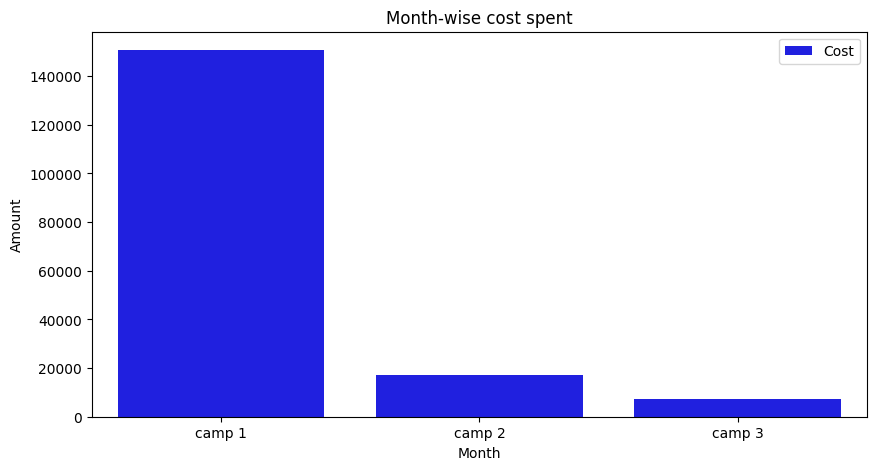

In [12]:
df_campaign = df.groupby('campaign_number')[['cost']].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='campaign_number', y='cost', data=df_campaign, color='blue', label='Cost')
plt.title('Month-wise cost spent')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.show()

In [13]:
#Conclusion 2 - Spending more on different campaigns can help in more revenue generation

In [14]:
df.columns

Index(['month', 'day', 'campaign_number', 'user_engagement', 'banner',
       'placement', 'displays', 'cost', 'clicks', 'revenue',
       'post_click_conversions', 'post_click_sales_amount'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


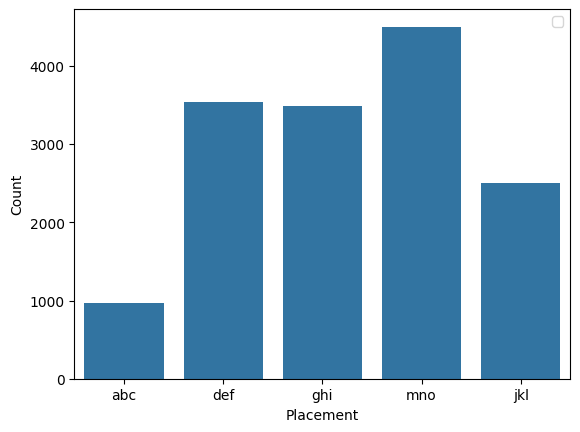

In [15]:
sns.countplot(data=df,x='placement')
plt.xlabel('Placement')
plt.ylabel('Count')
plt.legend()
plt.show()

In [16]:
#Conclusion 3- Maximum placement for ad is performed using mno

([0, 1, 2], [Text(0, 0, 'camp 1'), Text(1, 0, 'camp 2'), Text(2, 0, 'camp 3')])

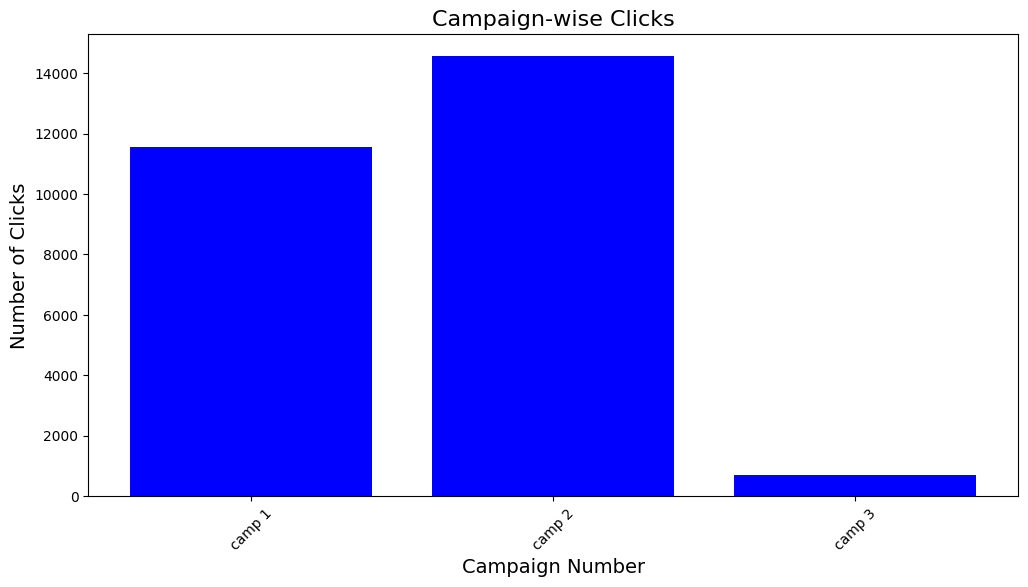

In [17]:
# Create figure
plt.figure(figsize=(12, 6))

# Bar charta
plt.bar(df['campaign_number'], df['clicks'], color='blue')

# Labels and title
plt.xlabel('Campaign Number', fontsize=14)
plt.ylabel('Number of Clicks', fontsize=14)
plt.title('Campaign-wise Clicks', fontsize=16)
plt.xticks(rotation=45)  # Rotate labels for better readability

([0, 1, 2], [Text(0, 0, 'camp 1'), Text(1, 0, 'camp 2'), Text(2, 0, 'camp 3')])

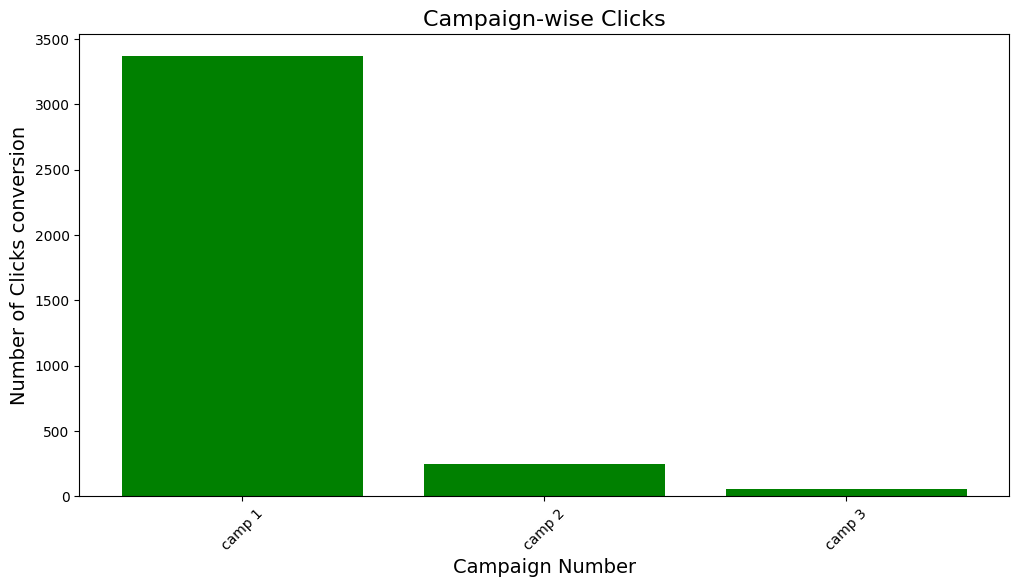

In [19]:
# Create figure
plt.figure(figsize=(12, 6))

# Bar charta
plt.bar(df['campaign_number'], df['post_click_conversions'], color='Green')

# Labels and title
plt.xlabel('Campaign Number', fontsize=14)
plt.ylabel('Number of Clicks conversion', fontsize=14)
plt.title('Campaign-wise Clicks', fontsize=16)
plt.xticks(rotation=45)  # Rotate labels for better readability

In [ ]:
# Conclusion 4 - more clicks were converted for campaign 1 though more clicks were made for capaign2

In [27]:
#Total profit earned ( revenue generated by cost used)
profit=df['revenue']-df['cost']
#Total profit earned
print("Total profit earned",profit.sum())

Total profit earned 101071.56640000001


In [28]:
# Feature Engineering - Convert categorical variables
ohe = OneHotEncoder(drop='first', sparse_output=False)
df_encoded = pd.DataFrame(ohe.fit_transform(df[categorical_cols]))
df_encoded.columns = ohe.get_feature_names_out(categorical_cols)
df = pd.concat([df.drop(columns=categorical_cols), df_encoded], axis=1)

In [29]:
df.head()

,day,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,month_June,month_May,campaign_number_camp 2,...,banner_468 x 60,banner_580 x 400,banner_670 x 90,banner_728 x 90,banner_800 x 250,placement_def,placement_ghi,placement_jkl,placement_mno,placement_nan
0,1,4,0.0060,0,0.0000,0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,20170,26.7824,158,28.9717,23,1972.4602,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,14701,27.6304,158,28.9771,78,2497.2636,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,171259,216.8750,1796,329.4518,617,24625.3234,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,552,0.0670,1,0.1834,0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


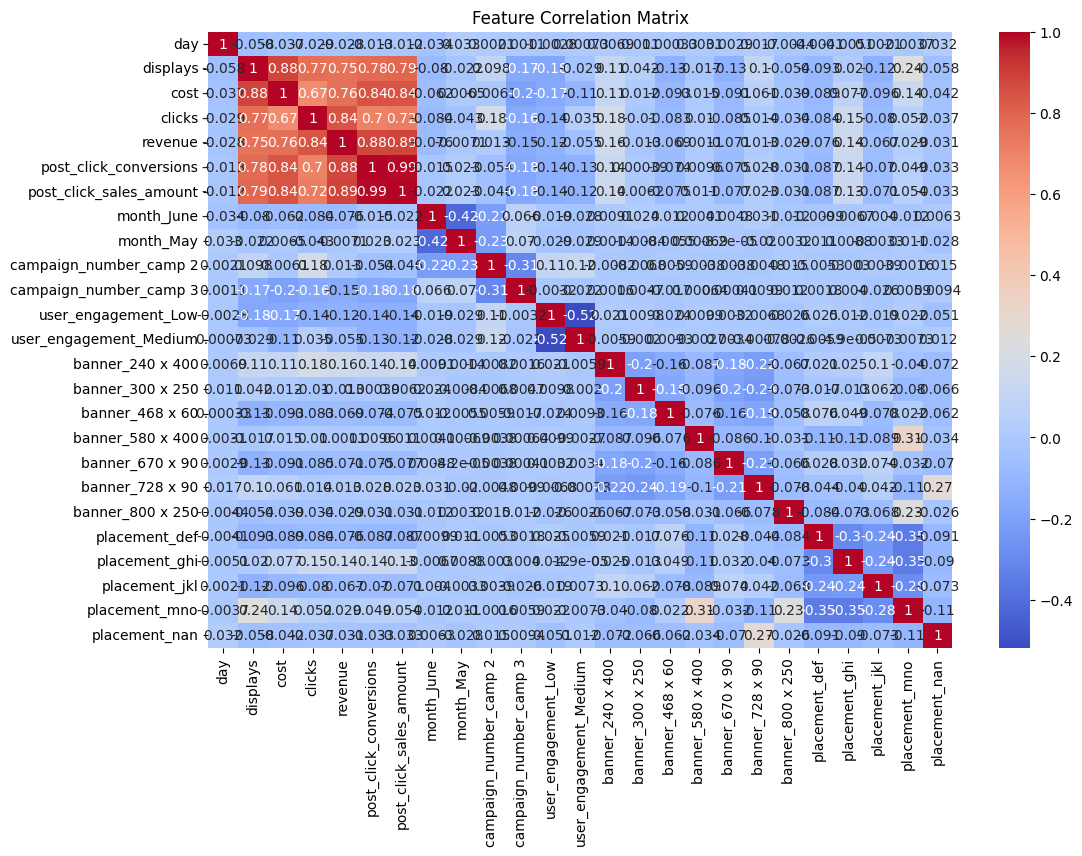

In [30]:
# Feature Selection - Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [31]:
#Conclusion 5 - displays, cost,clicks,clickes converted all strongly affect the total revenue generated

In [32]:
# Define target variable and independent variables
target = 'revenue'  # Adjust based on dataset structure
X = df.drop(columns=[target])
y = df[target]


Model Performance:
MAE: 1.0411682641142113
MSE: 72.92336125569165
R2 Score: 0.991104353218566


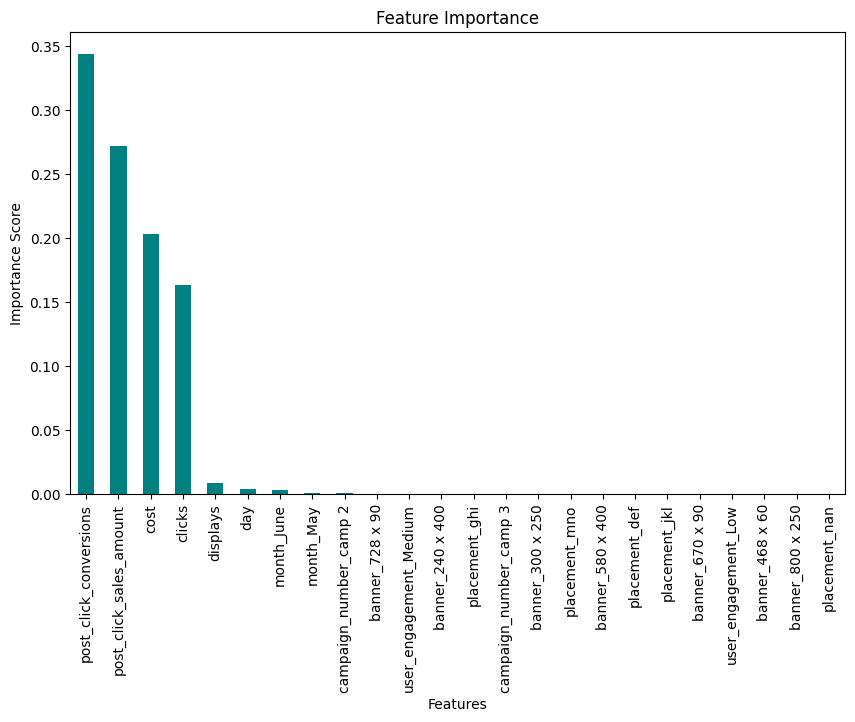

In [35]:
#Considering all features for predicting the revenue

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a machine learning model - Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:\nMAE: {mae}\nMSE: {mse}\nR2 Score: {r2}")

# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='teal')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


Model Performance:
MAE: 1.5127369146658014
MSE: 92.27117339842643
R2 Score: 0.9887441863275771


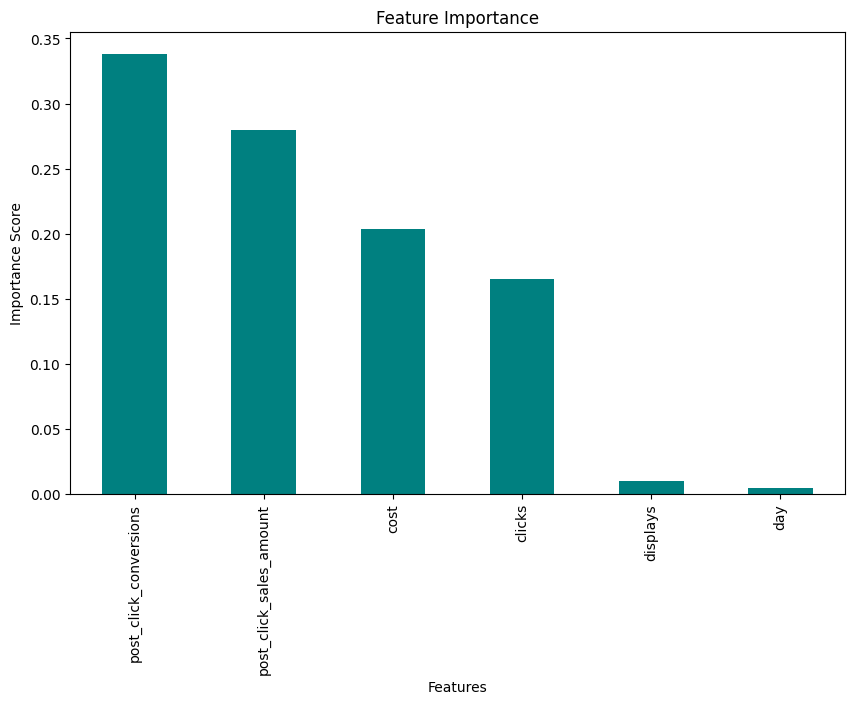

In [ ]:
#Utilizing top 6 features to predict the final output

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Set number of top features to select
k = 6  # Adjust based on your data

# Select top k features using mutual information
selector = SelectKBest(score_func=mutual_info_regression, k=k)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]

# Convert back to DataFrame with selected features
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a machine learning model - Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:\nMAE: {mae}\nMSE: {mse}\nR2 Score: {r2}")

# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=selected_features).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='teal')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()
